#Project:
Generative AI for Synthetic Data Generation & Analytics( Healthcare data)
#Objective:

Generate realistic synthetic datasets to augment limited real-world data, then visualize and validate data similarity.

#Tools:

Python

PyTorch (for GAN)

Pandas, NumPy

Matplotlib & Seaborn

Scikit-learn (optional for preprocessing/validation)

#Install packages

In [1]:
!pip install torch torchvision matplotlib seaborn pandas scikit-learn

In [21]:
!pip install tqdm

#Import Libraries

In [29]:
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


Load Dataset

In [42]:
df = pd.read_csv("/content/healthcare_dataset.csv.zip")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [8]:
print(df.head())
print(df.info())
print(df.describe())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

Data Preprocessing

In [13]:
# numeric columns for scaling
numeric_cols =df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_cols]

#Initialize the scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_numeric)


 GAN

In [60]:
# Convert to PyTorch Tensor
data_tensor = torch.tensor(data_scaled, dtype=torch.float32)

latent_dim = 10  # Random noise dimension
data_dim = data_tensor.shape[1]

# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, data_dim),
           nn.Sigmoid()  # Output normalized data
        )
    def forward(self, z):
        return self.model(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(data_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()  # Output probability
        )
    def forward(self, x):
        return self.model(x)

# Initialize models
G = Generator().to(device)
D = Discriminator().to(device)

 Loss & Optimizer

In [46]:
criterion = nn.BCELoss()
lr = 0.0002

optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)

#Train GAN

In [58]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# numeric columns for scaling
numeric_cols = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_cols]

# Initialize the scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Convert to PyTorch Tensor
data_tensor = torch.tensor(data_scaled, dtype=torch.float32)

latent_dim = 10  # Random noise dimension
data_dim = data_tensor.shape[1]  # Number of features

# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, data_dim),
           nn.Sigmoid()  # Output normalized data
        )
    def forward(self, z):
        return self.model(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(data_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()  # Output probability
        )
    def forward(self, x):
        return self.model(x)

# Initialize models
G = Generator().to(device)
D = Discriminator().to(device)

# optimizer_G, and optimizer_D are defined from previous cells
criterion = nn.BCELoss()
lr = 0.0002
optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)


# dataset and loader
batch_size = 32
dataset = TensorDataset(data_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# GAN Training (Simplified)
epochs = 500
G.train()
D.train()

for epoch in tqdm(range(epochs), desc="Training GAN"):
    for real_data, in dataloader:
        real_data = real_data.to(device)
        batch_size = real_data.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator

        optimizer_D.zero_grad()
        outputs_real = D(real_data)
        loss_real = criterion(outputs_real, real_labels)

        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z)
        outputs_fake = D(fake_data.detach())
        loss_fake = criterion(outputs_fake, fake_labels)

        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()


        # Train Generator

        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z)
        outputs = D(fake_data)
        loss_G = criterion(outputs, real_labels)
        loss_G.backward()
        optimizer_G.step()

    # Print loss every 50 epochs
    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs} | D Loss: {loss_D.item():.4f} | G Loss: {loss_G.item():.4f}")

Training GAN:  10%|█         | 50/500 [06:38<56:08,  7.49s/it]

Epoch 50/500 | D Loss: 1.3879 | G Loss: 0.6840


Training GAN:  20%|██        | 100/500 [12:52<49:07,  7.37s/it]

Epoch 100/500 | D Loss: 1.3619 | G Loss: 0.7215


Training GAN:  30%|███       | 150/500 [19:28<45:58,  7.88s/it]

Epoch 150/500 | D Loss: 1.3863 | G Loss: 0.6931


Training GAN:  40%|████      | 200/500 [26:16<40:54,  8.18s/it]

Epoch 200/500 | D Loss: 1.3863 | G Loss: 0.6931


Training GAN:  50%|█████     | 250/500 [32:37<30:56,  7.42s/it]

Epoch 250/500 | D Loss: 1.3863 | G Loss: 0.6931


Training GAN:  60%|██████    | 300/500 [38:54<24:55,  7.48s/it]

Epoch 300/500 | D Loss: 1.3863 | G Loss: 0.6931


Training GAN:  70%|███████   | 350/500 [45:10<19:18,  7.73s/it]

Epoch 350/500 | D Loss: 1.3863 | G Loss: 0.6931


Training GAN:  80%|████████  | 400/500 [51:32<12:40,  7.60s/it]

Epoch 400/500 | D Loss: 1.3863 | G Loss: 0.6931


Training GAN:  90%|█████████ | 450/500 [57:50<06:16,  7.54s/it]

Epoch 450/500 | D Loss: 1.3863 | G Loss: 0.6931


Training GAN: 100%|██████████| 500/500 [1:04:11<00:00,  7.70s/it]

Epoch 500/500 | D Loss: 1.3863 | G Loss: 0.6931


#Synthetic Data

In [32]:
num_samples = 500
z = torch.randn(num_samples, latent_dim).to(device)
synthetic_data = G(z).cpu().detach().numpy()

# DataFrame with only the numeric columns
synthetic_df_numeric = pd.DataFrame(scaler.inverse_transform(synthetic_data), columns=numeric_cols)
synthetic_df_numeric.head()

,Age,Billing Amount,Room Number
0,52.934757,25331.742188,300.307526
1,51.832958,25954.726562,294.195343
2,50.704994,25220.585938,297.402557
3,50.222351,25326.142578,303.422607
4,49.258732,25037.857422,308.196106


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Billing Amount'].plot(kind='hist', bins=20, title='Billing Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Room Number'].plot(kind='hist', bins=20, title='Room Number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Age', y='Billing Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Billing Amount', y='Room Number', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Billing Amount'].plot(kind='line', figsize=(8, 4), title='Billing Amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Room Number'].plot(kind='line', figsize=(8, 4), title='Room Number')
plt.gca().spines[['top', 'right']].set_visible(False)

Visualizations

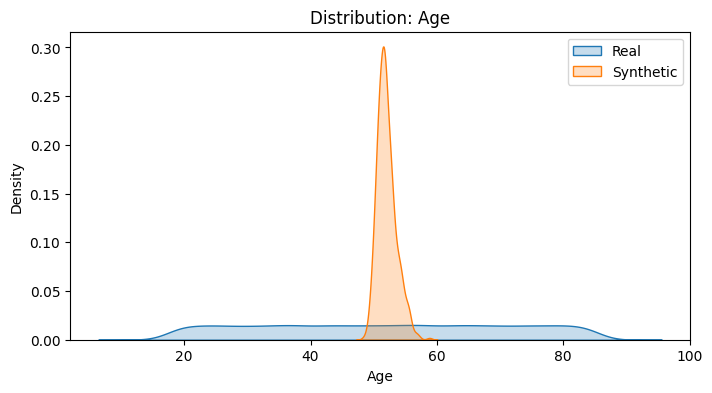

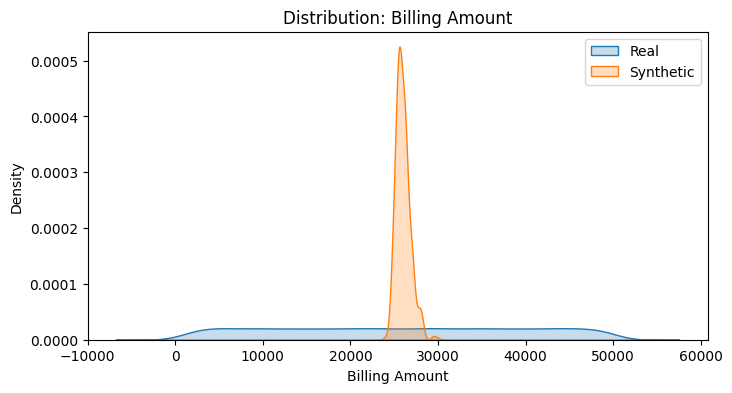

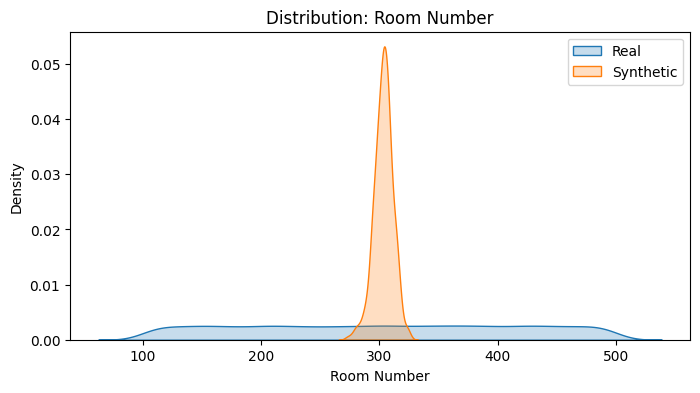

In [34]:
# Distribution plots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[col], label='Real', fill=True)
    sns.kdeplot(synthetic_df_numeric[col], label='Synthetic', fill=True)
    plt.title(f"Distribution: {col}")
    plt.legend()
    plt.show()

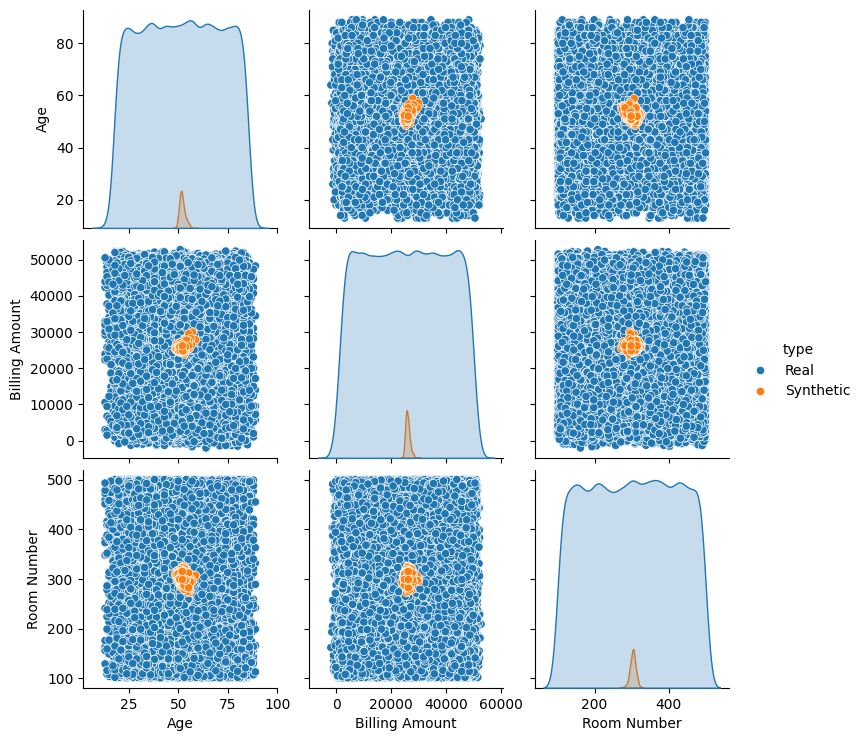

In [56]:
#Pairplot comparison (heavy for many features)
sns.pairplot(pd.concat([df.assign(type='Real'), synthetic_df_numeric.assign(type='Synthetic')]), hue='type')
plt.show()

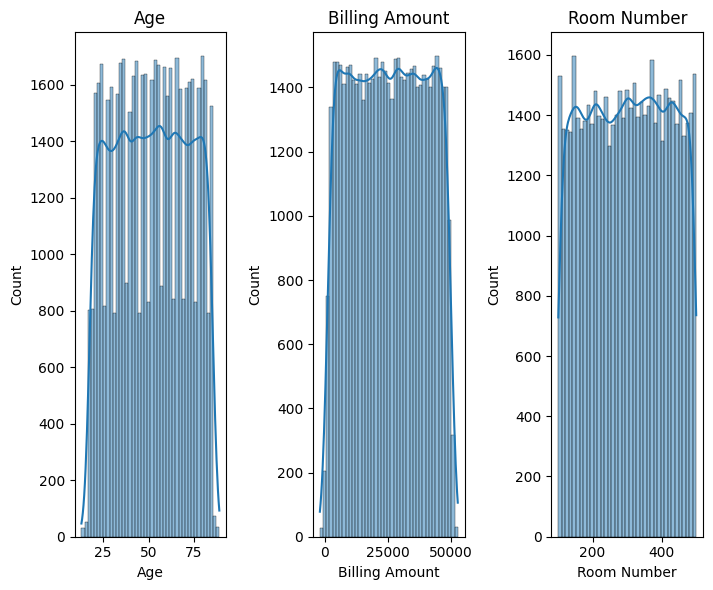

In [54]:
# Plot distributions for first few numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:5]):
    plt.subplot(1, 5, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [59]:
synthetic_df_numeric.to_csv("synthetic_data.csv", index=False)
print("Synthetic data saved as 'synthetic_data.csv'!")

Synthetic data saved as 'synthetic_data.csv'!
